# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
import sys
!{sys.executable} -m pip install citipy 
from citipy import citipy


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [9]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

679

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [18]:
# create a params dict that will be updated with new city each iteration
params = {"APPID": api_key}

CityList = []
CloudinessList = []
CountryList = []
DateList = []
HumidityList =[]
LatList = []
LngList = []
MaxTempList = []
WindSpeedList = []

count = 0
print('Beginning Data Retrieval')
for cityValue in cities:
    base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial"
    # update address key value
    params['q'] = f"{cityValue}"
    
    cityWeatherParameters = requests.get(base_url, params = params)
    
    try:
        
        print('Processing Record ' + str(count) + ' of Set ' + '1' + ' | ' + cityValue)
        #print(cityWeatherParameters.url)

        cityWeatherParameters = cityWeatherParameters.json()

        # get the columns from json
        CityList.append(cityWeatherParameters['name'])
        CloudinessList.append(cityWeatherParameters['clouds']['all'])
        CountryList.append(cityWeatherParameters['sys']['country'])
        DateList.append(cityWeatherParameters['dt'])
        HumidityList.append(cityWeatherParameters['main']['humidity'])
        LatList.append(cityWeatherParameters['coord']['lat'])
        LngList.append(cityWeatherParameters['coord']['lon'])
        MaxTempList.append(cityWeatherParameters['main']['temp_max'])
        WindSpeedList.append(cityWeatherParameters['wind']['speed'])
        count = count + 1
                
    except (KeyError, IndexError):
        print('City not found. Skipping...')

print('----------------------------------')
print('Data Retrieval Complete')
print('----------------------------------')

Beginning Data Retrieval
Processing Record 0 of Set 1 | rikitea
Processing Record 1 of Set 1 | bredasdorp
Processing Record 2 of Set 1 | terrace
Processing Record 3 of Set 1 | castro
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | ouadda
Processing Record 7 of Set 1 | cidreira
Processing Record 8 of Set 1 | aksu
Processing Record 9 of Set 1 | meridian
Processing Record 10 of Set 1 | sedro-woolley
Processing Record 11 of Set 1 | yellowknife
Processing Record 12 of Set 1 | arica
Processing Record 13 of Set 1 | san patricio
Processing Record 14 of Set 1 | urdoma
Processing Record 15 of Set 1 | saskylakh
Processing Record 16 of Set 1 | matara
Processing Record 17 of Set 1 | ciras
City not found. Skipping...
Processing Record 17 of Set 1 | cherskiy
Processing Record 18 of Set 1 | lebu
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | alyangula
Processing Record 21 of Set 1 | hithadhoo
Processing Record 22 o

Processing Record 175 of Set 1 | port arthur
Processing Record 176 of Set 1 | saldanha
Processing Record 177 of Set 1 | hofn
Processing Record 178 of Set 1 | broken hill
Processing Record 179 of Set 1 | kailua
Processing Record 180 of Set 1 | dikson
Processing Record 181 of Set 1 | nara
Processing Record 182 of Set 1 | dunedin
Processing Record 183 of Set 1 | loano
Processing Record 184 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 184 of Set 1 | akyab
City not found. Skipping...
Processing Record 184 of Set 1 | kholbon
Processing Record 185 of Set 1 | codrington
Processing Record 186 of Set 1 | airai
Processing Record 187 of Set 1 | atasu
Processing Record 188 of Set 1 | pacific grove
Processing Record 189 of Set 1 | ternate
Processing Record 190 of Set 1 | huamuxtitlan
Processing Record 191 of Set 1 | dzhusaly
City not found. Skipping...
Processing Record 191 of Set 1 | barrow
Processing Record 192 of Set 1 | copiapo
Processing Record 193 of Set 1 | luangwa
Pro

Processing Record 340 of Set 1 | coahuayana
Processing Record 341 of Set 1 | san pedro de ycuamandiyu
Processing Record 342 of Set 1 | bairiki
City not found. Skipping...
Processing Record 342 of Set 1 | henties bay
Processing Record 343 of Set 1 | monywa
Processing Record 344 of Set 1 | gravdal
Processing Record 345 of Set 1 | havelock
Processing Record 346 of Set 1 | gorontalo
Processing Record 347 of Set 1 | vila velha
Processing Record 348 of Set 1 | knysna
Processing Record 349 of Set 1 | moosomin
Processing Record 350 of Set 1 | manaus
Processing Record 351 of Set 1 | belaya gora
Processing Record 352 of Set 1 | formosa do rio preto
Processing Record 353 of Set 1 | puerto escondido
Processing Record 354 of Set 1 | beya
Processing Record 355 of Set 1 | acapulco
Processing Record 356 of Set 1 | san lorenzo de el escorial
Processing Record 357 of Set 1 | marv dasht
City not found. Skipping...
Processing Record 357 of Set 1 | cabedelo
Processing Record 358 of Set 1 | iracoubo
Process

Processing Record 504 of Set 1 | culpeper
Processing Record 505 of Set 1 | xining
Processing Record 506 of Set 1 | miri
Processing Record 507 of Set 1 | plouzane
Processing Record 508 of Set 1 | antofagasta
Processing Record 509 of Set 1 | cuncolim
Processing Record 510 of Set 1 | margate
Processing Record 511 of Set 1 | orshanka
Processing Record 512 of Set 1 | san luis
Processing Record 513 of Set 1 | eldikan
City not found. Skipping...
Processing Record 513 of Set 1 | tuatapere
Processing Record 514 of Set 1 | tingi
Processing Record 515 of Set 1 | crystal
Processing Record 516 of Set 1 | russell
Processing Record 517 of Set 1 | uyuni
Processing Record 518 of Set 1 | canutama
Processing Record 519 of Set 1 | ilek
Processing Record 520 of Set 1 | bur gabo
City not found. Skipping...
Processing Record 520 of Set 1 | peniche
Processing Record 521 of Set 1 | tautira
Processing Record 522 of Set 1 | basco
Processing Record 523 of Set 1 | manama
Processing Record 524 of Set 1 | mutsamudu


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [19]:
allCityWeatherDataDF = {
    'City':CityList,
    'Cloudiness':CloudinessList,
    'Country':CountryList,
    'Date':DateList,
    'Humidity':HumidityList,
    'Lat':LatList,
    'Lng':LngList,
    'Max Temp':MaxTempList,
    'Wind Speed':WindSpeedList
}

allCityWeatherDataDF = pd.DataFrame(allCityWeatherDataDF)
allCityWeatherDataDF.Date = allCityWeatherDataDF.Date.map(lambda x: '{:.0f}'.format(x))
allCityWeatherDataDF.Cloudiness = allCityWeatherDataDF.Cloudiness.map(lambda x: '{:.0f}'.format(x))
allCityWeatherDataDF.Humidity = allCityWeatherDataDF.Humidity.map(lambda x: '{:.0f}'.format(x))

allCityWeatherDataDF.to_csv("CityWeatherPy_Yash.csv", index = True, header = True)
allCityWeatherDataDF.apply(len)

City          616
Cloudiness    616
Country       616
Date          616
Humidity      616
Lat           616
Lng           616
Max Temp      616
Wind Speed    616
dtype: int64

In [20]:
allCityWeatherDataDF.head(5)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Rikitea,19,PF,1559705229,79,-23.12,-134.97,75.93,2.37
1,Bredasdorp,13,ZA,1559705075,62,-34.53,20.04,60.01,23.04
2,Terrace,75,CA,1559705297,81,54.52,-128.61,50.00,14.99
3,Castro,100,CL,1559705077,87,-42.48,-73.76,50.00,17.22
4,Mataura,44,NZ,1559705231,69,-46.19,168.86,45.69,7.38


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

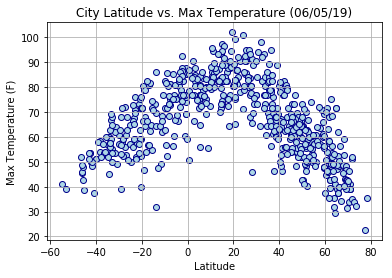

In [21]:
DateListCoverterFormat = pd.to_datetime(DateList,unit='s').strftime('%m/%d/%y')
UniqueDate = list(set(DateListCoverterFormat))[0]

plt.scatter(LatList, MaxTempList, marker="o", color="lightblue",edgecolors ='darkblue')
plt.title("City Latitude vs. Max Temperature (" + UniqueDate +")")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.yticks(np.arange(round(min(MaxTempList)/10,0)*10, (round(max(MaxTempList)/10,0)+1)*10, step=10))

# Save the Figure
plt.savefig('CityLatitude_vs_MaxTemperature.png')


plt.show()

#### Latitude vs. Humidity Plot

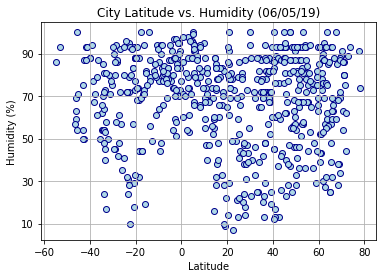

In [22]:
DateListCoverterFormat = pd.to_datetime(DateList,unit='s').strftime('%m/%d/%y')
UniqueDate = list(set(DateListCoverterFormat))[0]

plt.scatter(LatList, HumidityList, marker="o", color="lightblue",edgecolors ='darkblue')
plt.title("City Latitude vs. Humidity (" + UniqueDate +")")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.yticks(np.arange(round(min(HumidityList)/10,0)*10, (round(max(HumidityList)/10,0)+1)*10, step=20))

# Save the Figure
plt.savefig('CityLatitude_vs_Humidity.png')

plt.show()

#### Latitude vs. Cloudiness Plot

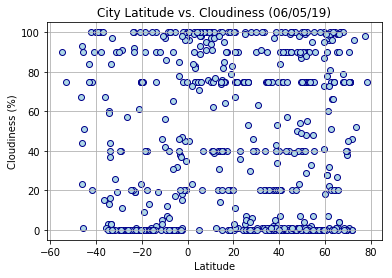

In [23]:
DateListCoverterFormat = pd.to_datetime(DateList,unit='s').strftime('%m/%d/%y')
UniqueDate = list(set(DateListCoverterFormat))[0]

plt.scatter(LatList, CloudinessList, marker="o", color="lightblue",edgecolors ='darkblue')
plt.title("City Latitude vs. Cloudiness (" + UniqueDate +")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.yticks(np.arange(round(min(CloudinessList)/10,0)*10, (round(max(CloudinessList)/10,0)+1)*10, step=20))

# Save the Figure
plt.savefig('CityLatitude_vs_Cloudiness.png')

plt.show()

#### Latitude vs. Wind Speed Plot

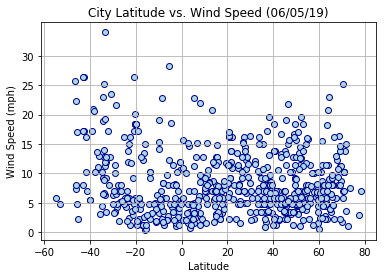

In [24]:
DateListCoverterFormat = pd.to_datetime(DateList,unit='s').strftime('%m/%d/%y')
UniqueDate = list(set(DateListCoverterFormat))[0]

plt.scatter(LatList, WindSpeedList, marker="o", color="lightblue",edgecolors ='darkblue')
plt.title("City Latitude vs. Wind Speed (" + UniqueDate +")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.yticks(np.arange(round(min(WindSpeedList)/10,0)*10, (round(max(WindSpeedList)/10,0)+0.5)*10, step=5))

# Save the Figure
plt.savefig('CityLatitude_vs_WindSpeed.png')

plt.show()